<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_290to319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05 회귀**



---

## **01 회귀 소개**
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 종속변수, 독립변수, 독립변수의 값에 영향을 미치는 회귀 계수
- 최적의 회귀 계수를 찾아내는 것이 핵심
- 독립 변수가 하나이면 단일 회귀, 여러 개이면 다중 회귀
- 분류: 예측값이 카테고리와 같은 이산형 클래스
- 회귀: 예측값이 연속형 숫자값
- 선형 회귀 모델은 규제 방법에 따라 별도의 유형으로 나눌 수 있음
  - 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화, 규제 X
  - 릿지: L2 규제 적용, 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 계수 값을 줄임
  - 라쏘: L1 규제 적용, 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 피처가 선택되지 않도록
  - 엘라스틱넷: L2와 L1 규제를 결합
  - 로지스틱 회귀: 분류에 사용되는 선형 모델

## **02 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀: 독립변수도 하나, 종속변수도 하나
- 2차원 평면에서 기울기와 절편을 가진 1차 함수식으로 모델링 가능
- 오류 합을 더하면 크게 줄어들 수 있음
  - 절대값을 취해 더하거나
  - 제곱을 구해서 더함: RSS
  - 일반적으로 RSS 방식으로 오류 합을 구함

- RSS를 최소로 하는 회귀 계쑤를 학습을 통해 찾는 것이 핵심

## **03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

어떻게 비용 함수가 최소가 되는 파라미터를 구할 수 있는가?
- 점진적으로 반복적인 계산을 통해 업데이트 하면서 오류 값이 최소가 되도록 하는 파라미터를 구하는 방식
- 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
- 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 파라미터를 최적의 파라미터로 ㅂㄴ환


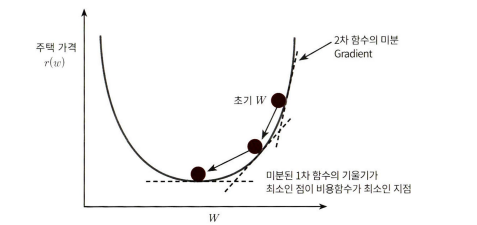

경사 하강법을 파이썬 코드로 구현

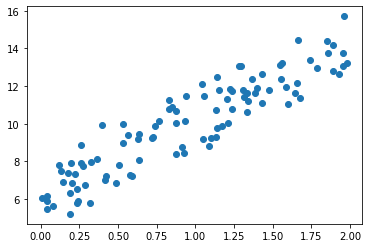

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [7]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [10]:
#w1 과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N=len(y)
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)

  y_pred=np.dot(X, w1.T)+w0
  diff=y-y_pred

  w0_factors=np.ones((N,1))

  w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [11]:
def gradient_descent_steps(X,y,iters=10000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1, w0

In [12]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1, w0=gradient_descent_steps(X,y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


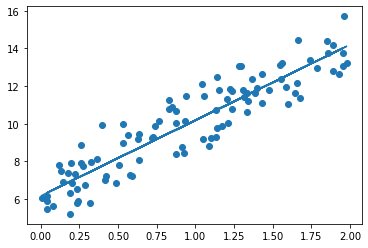

In [13]:
plt.scatter(X,y)
plt.plot(X, y_pred)

경사 하강법은 모든 학습 데이터에 대해서 업데이트 하기 때문에 수행 시간이 매우 오래 걸린단점이 존재

그래서 일부 데이터만 사용하는 확률적 경사 하강법이 존재

In [14]:
def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)

    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1, w0

In [15]:
w1, wo=stochastic_gradient_descent_steps(X,y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.162
Stochastic Gradient Descent Total Cost: 0.9936


## **05 다항 회귀와 과(대)적합/과소적합 이해**


---


### **다항 회귀 이해**
이번에는 독립변수와 종속변수의 관계가 일차 방정식의 형태

하지만, 모든 관계를 직선으로만 표현할 수 없음

- 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 함

- 비선형 회귀로 혼동하기 쉽지만 다항회귀는 선형 회귀임을 유의
- 회귀 계수가 선형/비선형인지 O, 독립변수의 선형/비선형 여부와 무관
- 사이킷런에서는 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음
- PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변경 해주어야 함


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X=np.arange(4).reshape(2,2)
print('일차 단항식 계숙 피처:\n', X)

poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계숙 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 회귀 함수를 임의로 설정하고 회귀 계수 예측해보기

In [17]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [19]:
#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### **다항 회귀를 이용한 과소적합 및 과적합 이해**

- 다항 회귀는 복잡한 다항 관계를 모델링할 수 있음
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- 하지만 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 환경에서는 오히려 예측 정확도가 떨어짐
- 즉 차수가 높아질수록 과적합 문제가 크게 발생


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
  return np.cos(1.5*np.pi *X)

np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232072 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.3177066 입니다.


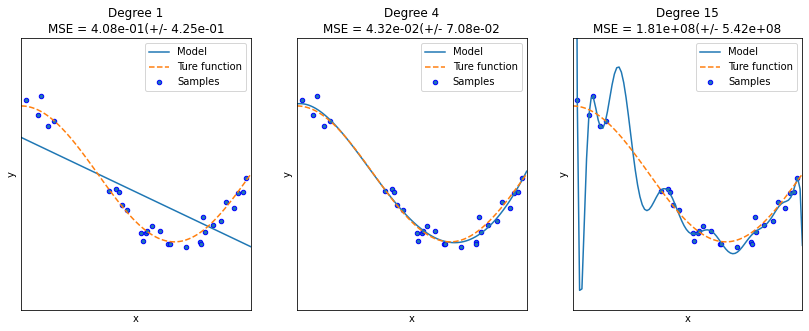

In [25]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_features', polynomial_features),
                     ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  scores=cross_val_score(pipeline, X.reshape(-1,1),y, scoring='neg_mean_squared_error', cv=10)

  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  X_test=np.linspace(0,1,100)

  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')

  plt.plot(X_test, true_fun(X_test), '--', label='Ture function')
  plt.scatter(X,y,edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 왼쪽은 단순한 선형 회귀와 같음. 제대로 반영하지 못하고 있는 과소 적합 모델
- 중간은 실제 데이터 세트와 유사하고 MSE 값은 0.043으로 뛰어난 예측 성능
- 오른쪽은 MSE 값이 어처구니 없는 값. 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델

### **편향-분산 트레이드오프(Bias-Variance Trade off)**

- 편향-분산 트레이드 오프는 머신러닝이 극복해야 할 가장 중요한 이슈
- 편향과 분산은 한쪽이 높으면 한 쪽이 낮아지는 경향이 있음
- 편향이 높으면 전체 오류가 높음
- 편향을 낮추면 분산이 높아지고 전체 오류는 낮아지게 됨
- 편향을 나주고 분산을 높이면서 전체 오류가 낮아지는 '골디락스' 지점을 통과 하면서 분산을 지속적으로 높이면 전체 오류값이 증가하면서 예측 성능 저하

- 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉬움